# ML1 Assignment 2 
# Notebook 2
### Musab - 29409

# Effects of Feature Selection

## Regression Dataset: Automobile Prices

In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # Model for regression dataset
from sklearn.neighbors import KNeighborsClassifier # Model for classifcation dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
from math import sqrt
from sklearn.feature_selection import SelectKBest, mutual_info_regression # Filter Method
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Wrapper Method
from sklearn.decomposition import PCA # Principle Componenet Analysis
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [83]:
# Set the LOKY_MAX_CPU_COUNT environment variable
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores you want to use

### Data Preprocessing

In [84]:
# Read the data from the file
filename = r'E:\IBA\Semester 1\Machine Learning 1\Assignment\Assignment2\automobile\imports-85.data'
column_names = [
    'symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
    'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
    'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
    'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
    'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
    'price'
]

# Read the dataset into a DataFrame
df = pd.read_csv(filename, names=column_names, header=None, delimiter=',', na_values='?')

# Display the first few rows of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [85]:
# Create a label encoder object
le = LabelEncoder()

# List of categorical columns to convert
categorical_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
                    'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']

# Apply Label Encoder on each of the categorical columns:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Replace NaN values with 0
df.fillna(0, inplace=True)

# Display the first few rows of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel_type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num_of_doors       205 non-null    int32  
 6   body_style         205 non-null    int32  
 7   drive_wheels       205 non-null    int32  
 8   engine_location    205 non-null    int32  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int32  
 15  num_of_cylinders   205 non-null    int32  
 16  engine_size        205 non

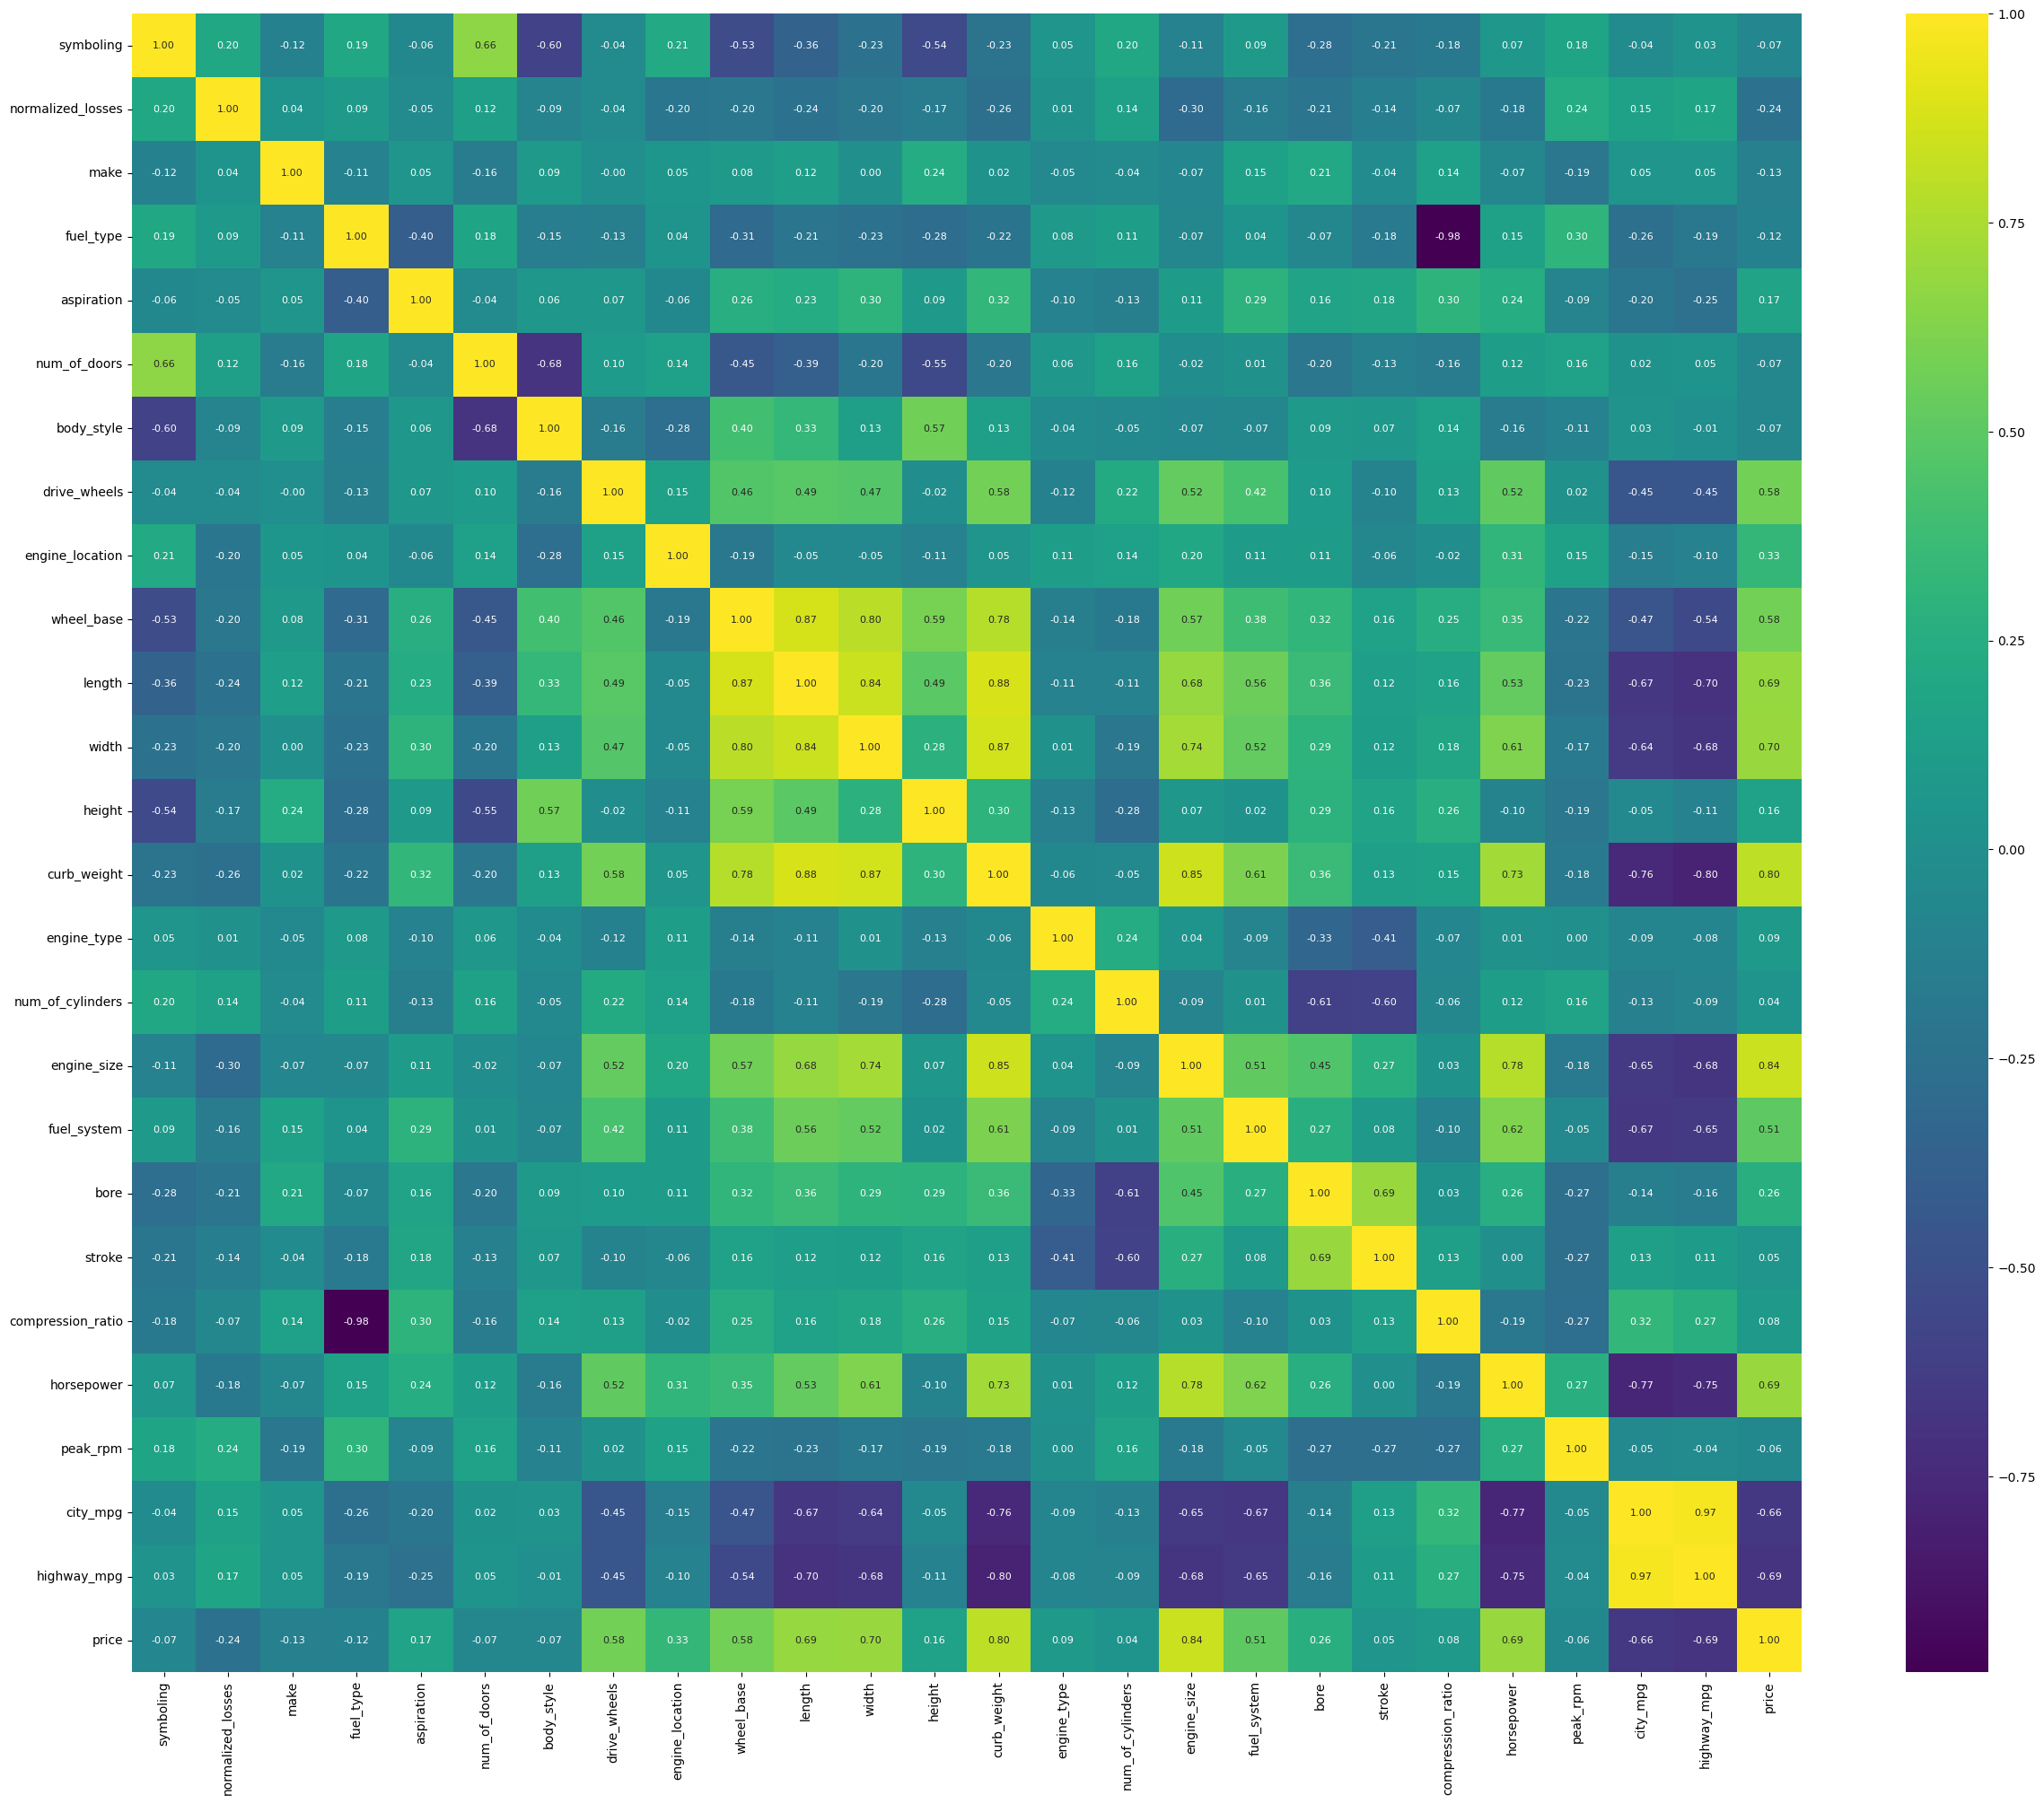

In [86]:
corr = df.corr()

plt.figure(figsize=(30, 24))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.show()

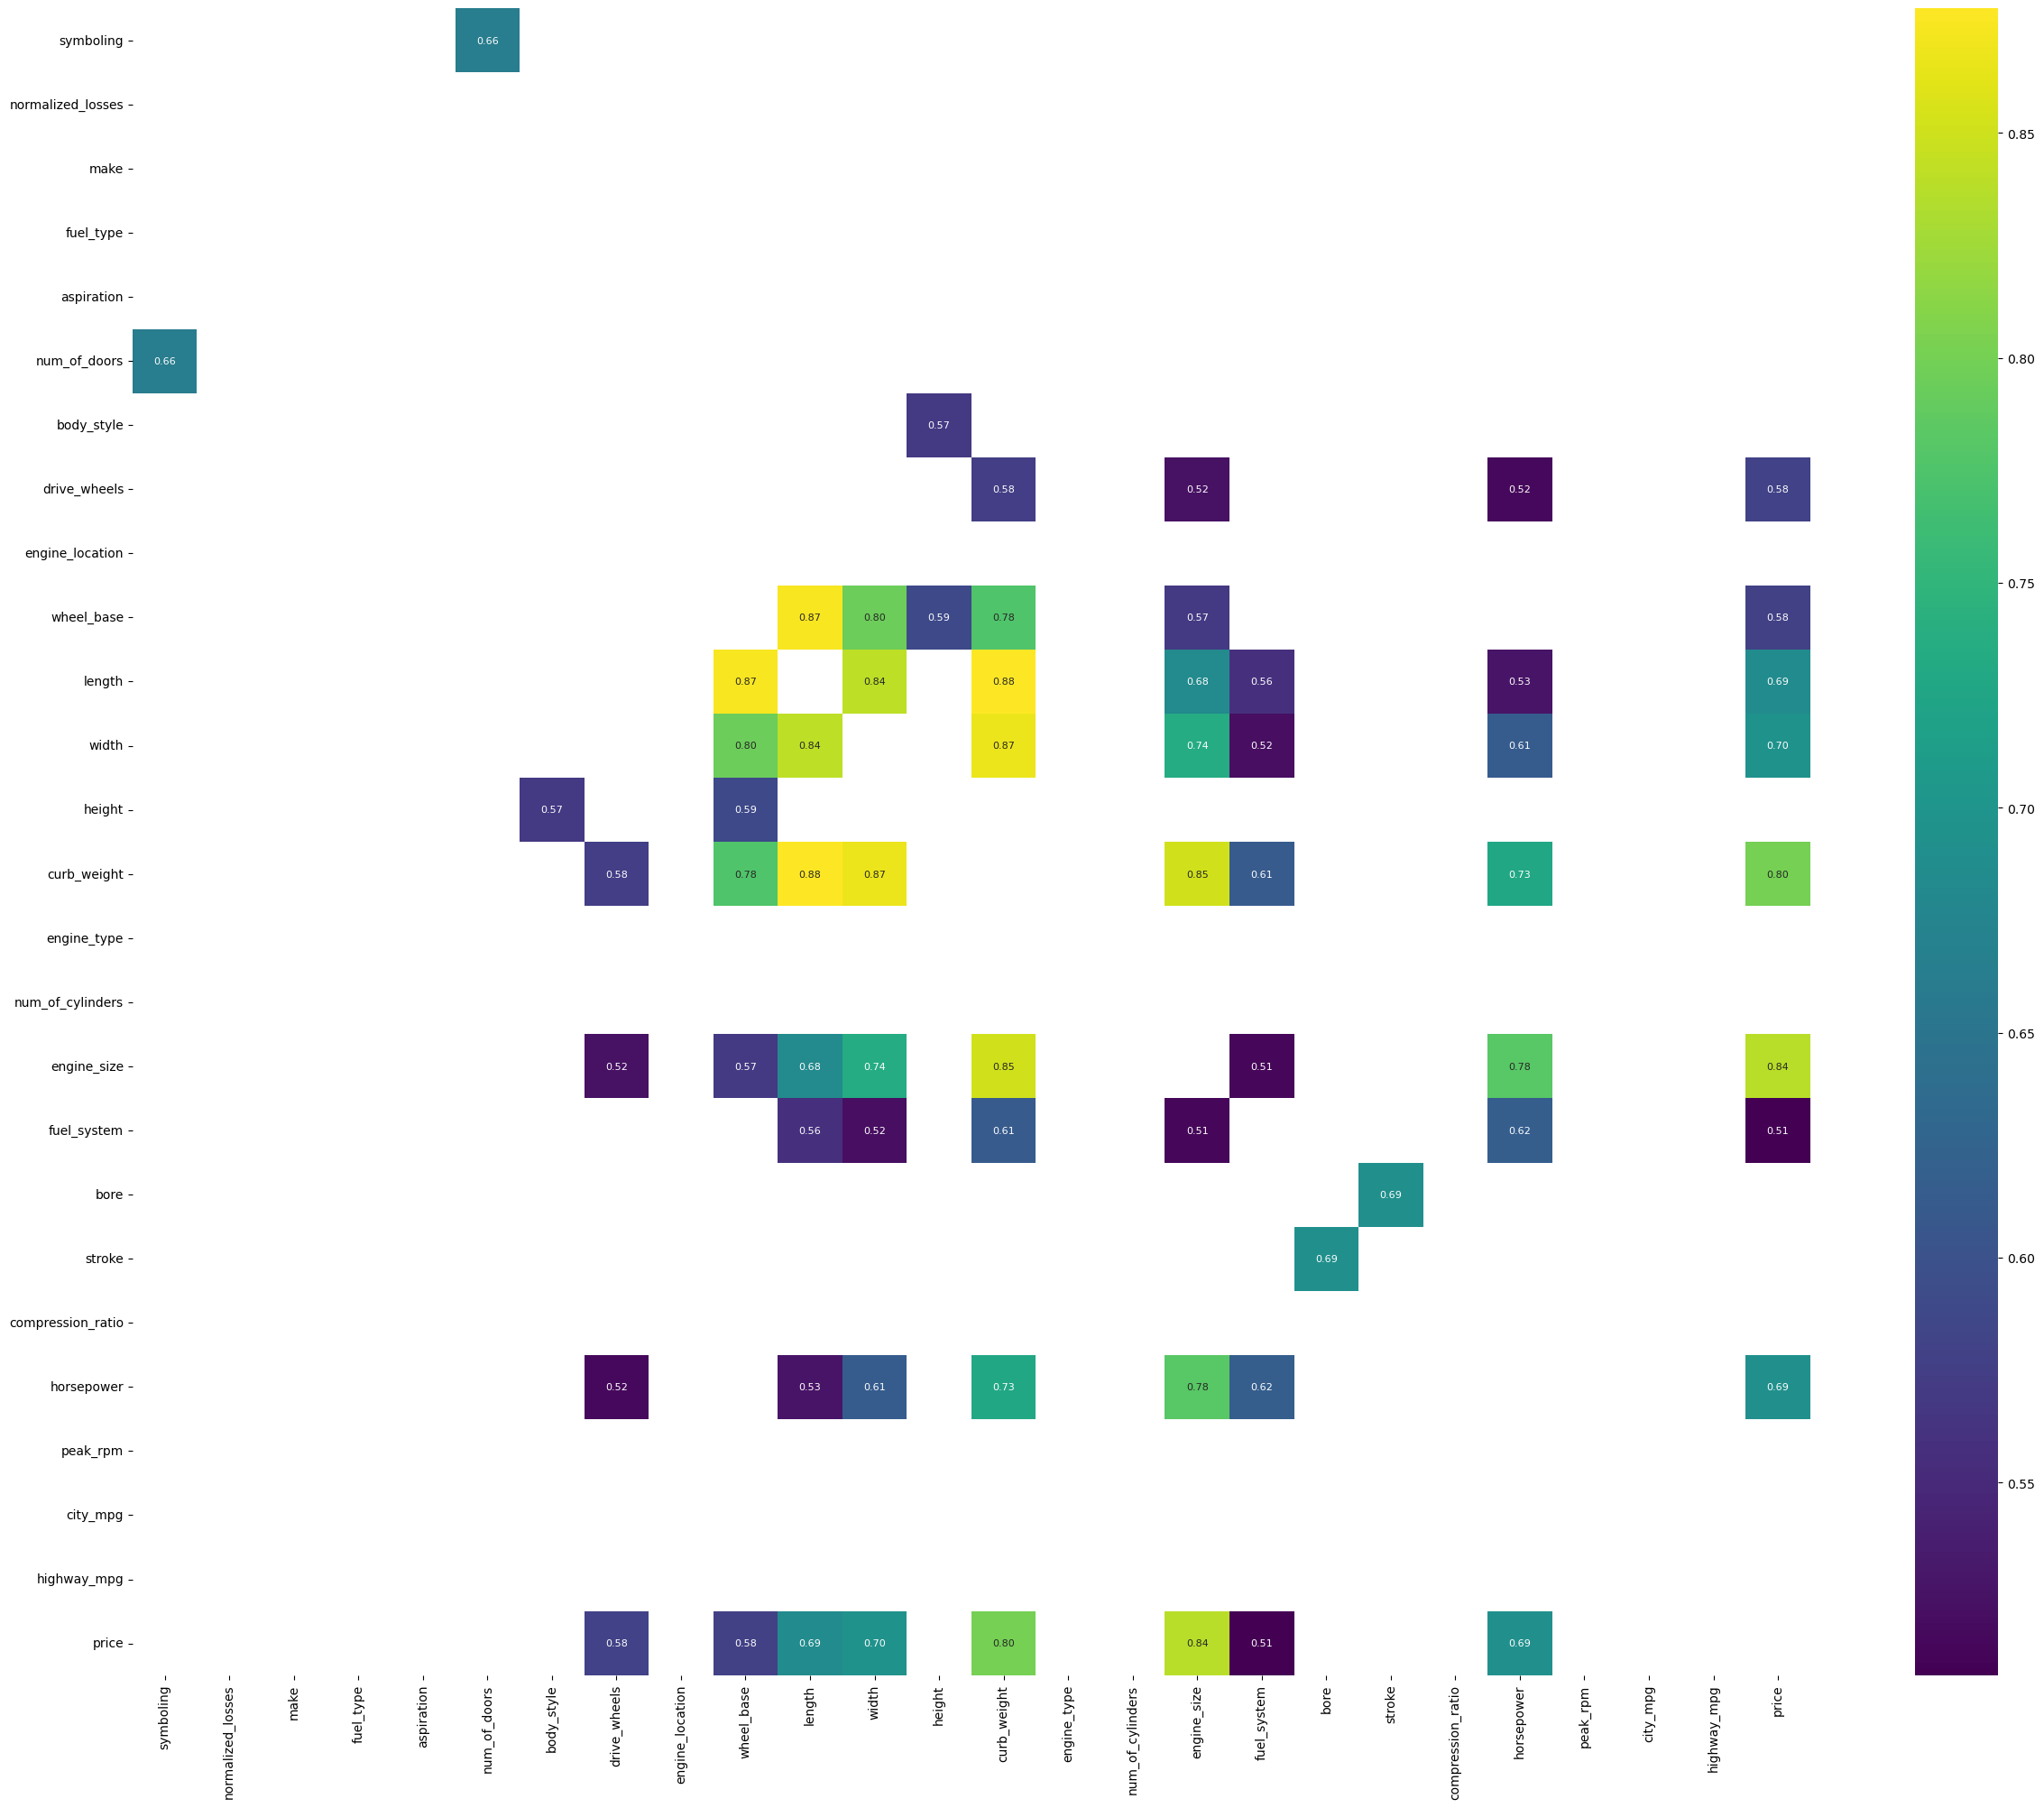

In [87]:
corr = corr.where((corr > 0.5) & (corr < 0.9))

plt.figure(figsize=(30, 24))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.show()

In [88]:
# perform data split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [89]:
# function to evaluate model and print results
def evaluate_knn_regressor(X_train, X_test, y_train, y_test, n_neighbors=5):
    # fit model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # predict
    y_pred = knn.predict(X_test)
    
    # calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

### No  Feature Selection

In [90]:
print('Results without feature selection,')
evaluate_knn_regressor(X_train, X_test, y_train, y_test)

Results without feature selection,
Mean Squared Error: 9364774.863414634
Mean Absolute Error: 2144.2292682926827
Root Mean Squared Error: 3060.191965124841
R2 Score: 0.8866477610504466


### Filter Method: Mutual Information

In [91]:
# perform data split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# select features using mutual information
mi_selector = SelectKBest(mutual_info_regression, k=5)
X_kbest = mi_selector.fit_transform(X, y)

# perform split using new X
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=3)

print('Results with Filter Method: Mutual Information,')
evaluate_knn_regressor(X_train, X_test, y_train, y_test)

Mean Squared Error: 10711565.648780487
Mean Absolute Error: 2252.3902439024396
Root Mean Squared Error: 3272.8528302966033
R2 Score: 0.8703460609941804


### Wrapper Method: Forward Feature Selection

In [92]:
# perform data split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Forward Feature Selection
sfs = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=0)

sfs = sfs.fit(X_train, y_train)
selected_features = X_train.columns[list(sfs.k_feature_idx_)]

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

print('Results with Wrapper Method: Forward Feature Selection,')
evaluate_knn_regressor(X_train_sfs, X_test_sfs, y_train, y_test)

Mean Squared Error: 16424062.061463414
Mean Absolute Error: 2900.9414634146337
Root Mean Squared Error: 4052.6611086375597
R2 Score: 0.8012013919751115


### PCA

In [93]:
# perform data split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# select features
pca = PCA(n_components=5)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Results with PCA,')
evaluate_knn_regressor(X_train_pca, X_test_pca, y_train, y_test)

Mean Squared Error: 9364774.863414634
Mean Absolute Error: 2144.2292682926827
Root Mean Squared Error: 3060.191965124841
R2 Score: 0.8866477610504466


### Interpretation Regression Dataset

After evaluating with different feature seletion techniques on regression dataset the final results for r2 are, 

No FS = 0.89,
Filter = 0.87,
Wrapper = 0.80,
PCA = 0.88

From this we can conclude that using feature selection the goodness of fit decreases slightly but that is an indication that we are preventing overfitting, so in live testing our model should perform well compared to no feature selection. 

## Classification Dataset: Student Dropout

### Data Preprocessing

In [94]:
filename2 = r'E:\IBA\Semester 1\Machine Learning 1\Assignment\Assignment2\student_dropout_data.csv'
df2 = pd.read_csv(filename2, delimiter=';')
dataset2_name = 'Student Drop Out Dataset'

In [95]:
df2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [96]:
le = LabelEncoder()
df2['Target'] = le.fit_transform(df2['Target'])
target_mapping = {index: label for index, label in enumerate(le.classes_)}

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


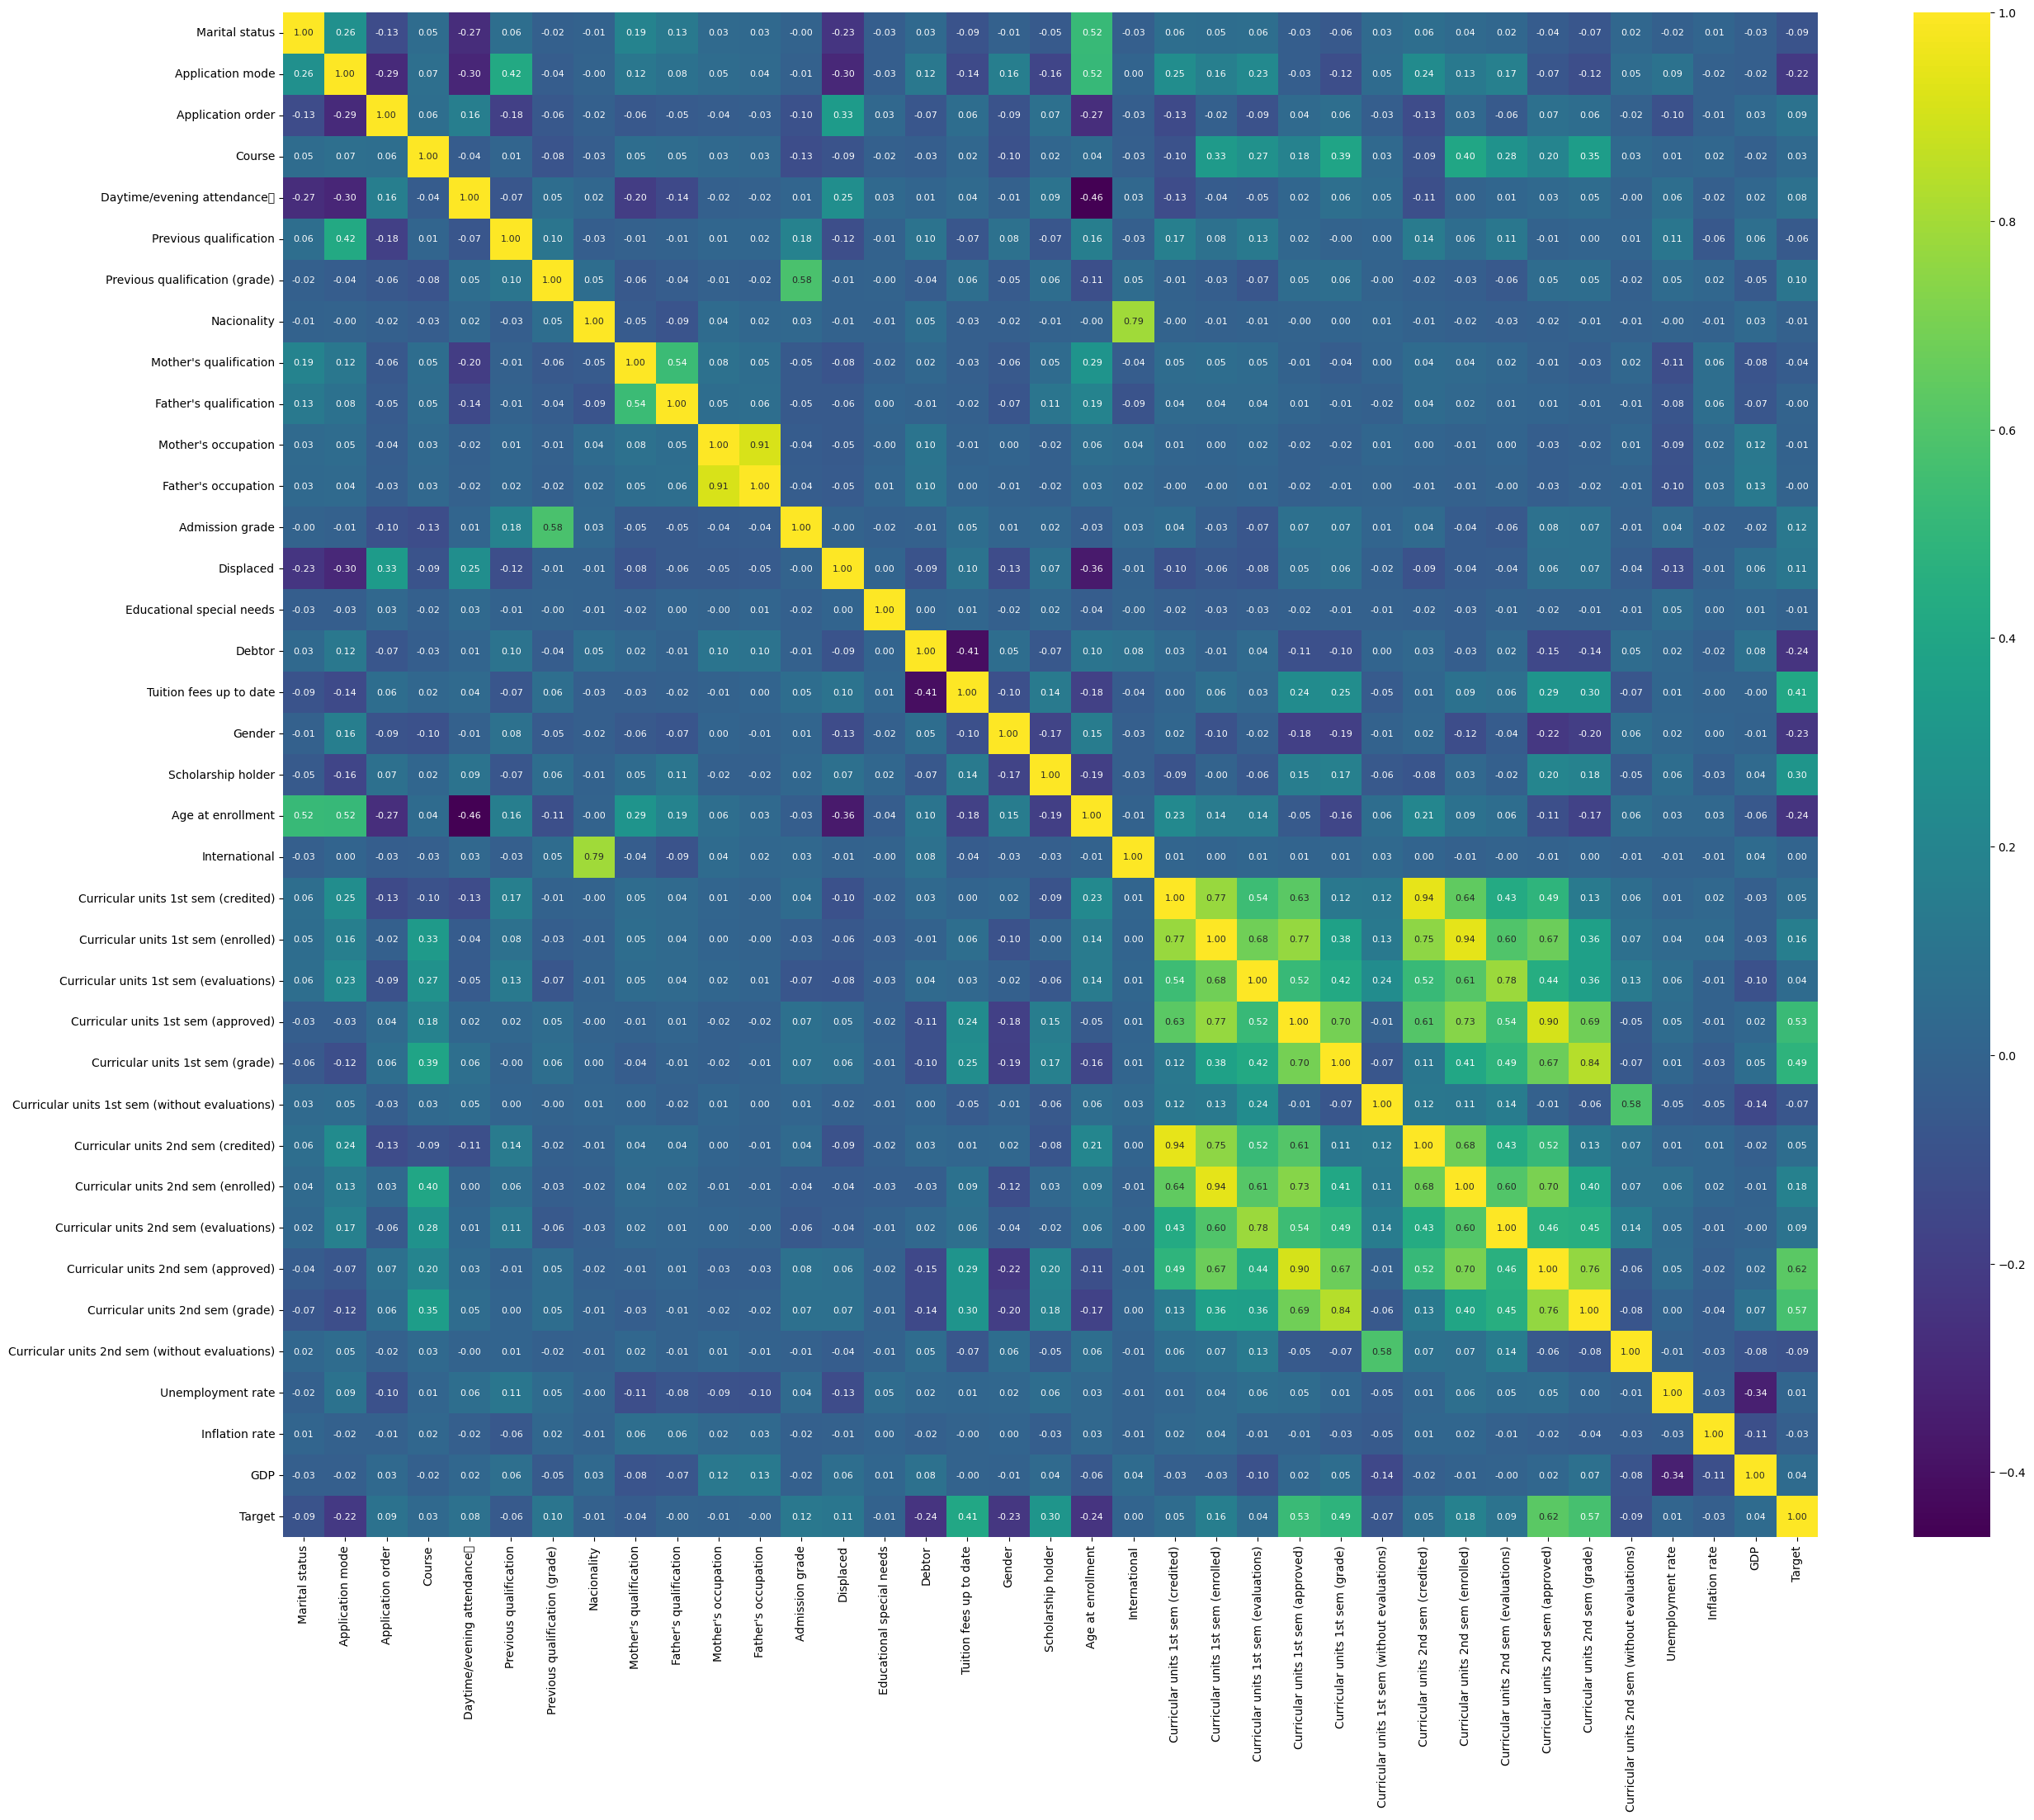

In [98]:
corr = df2.corr()

plt.figure(figsize=(30, 24))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.show()

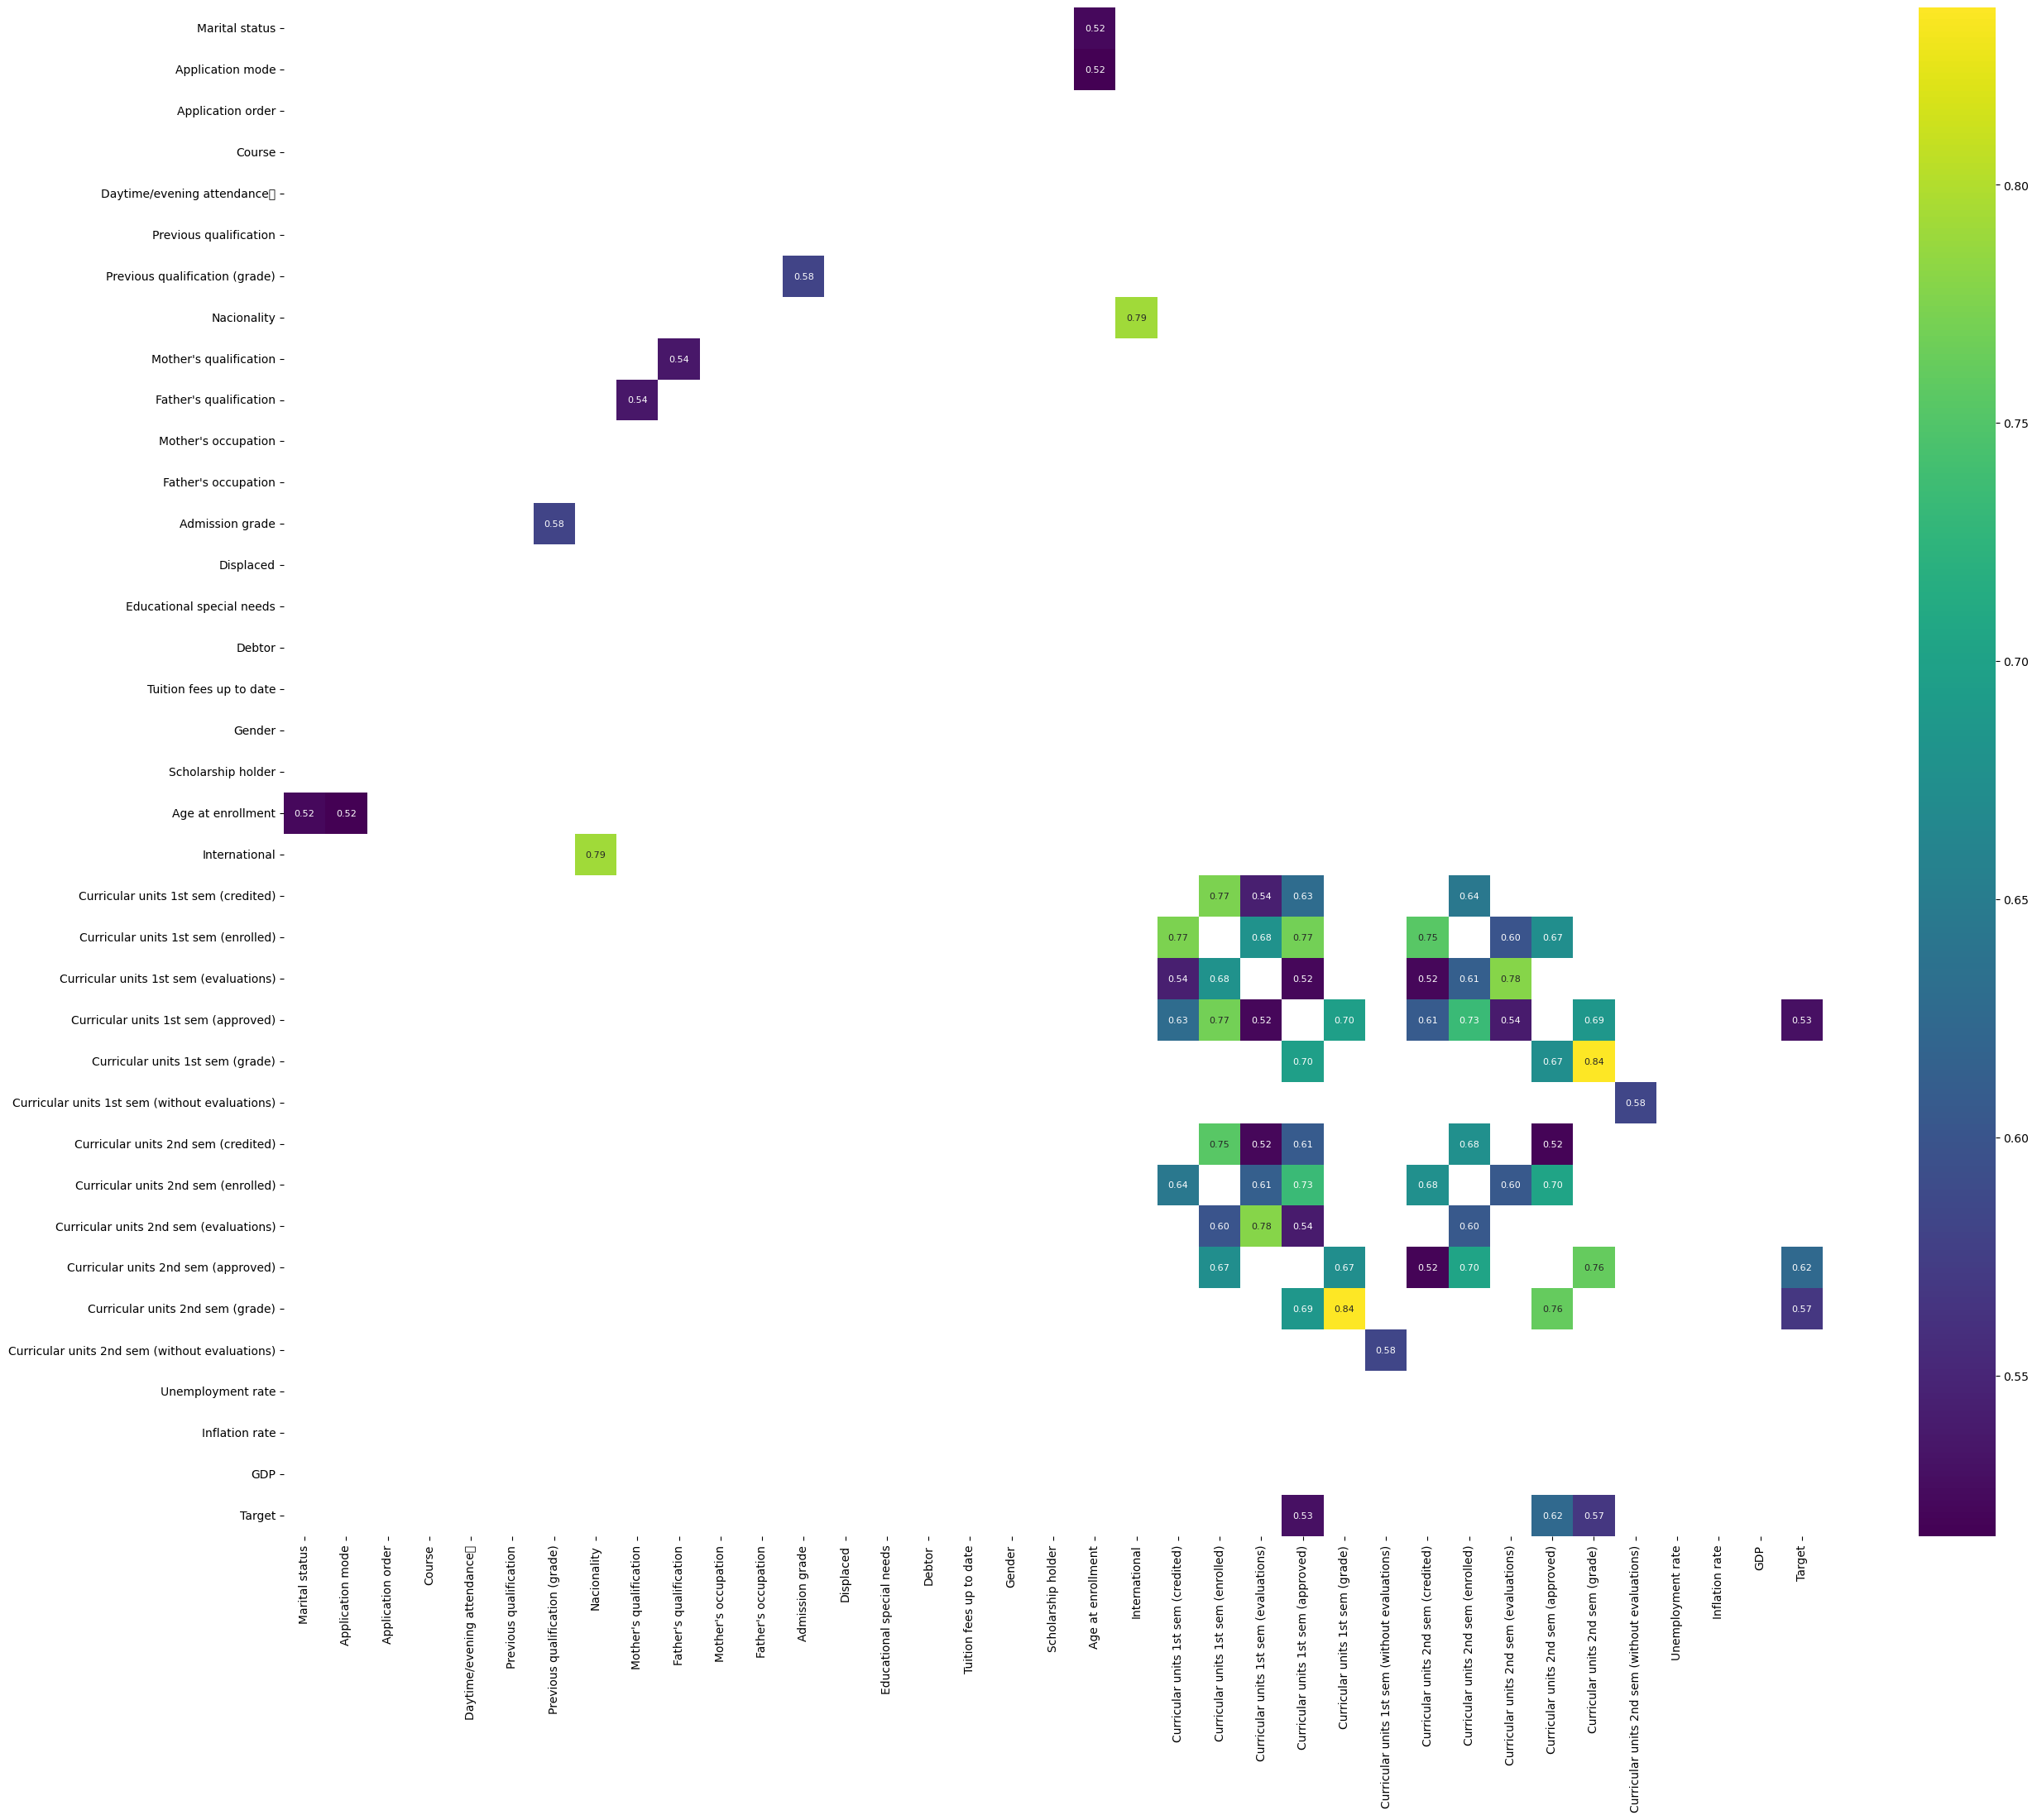

In [99]:
corr = corr.where((corr > 0.5) & (corr < 0.9))

plt.figure(figsize=(30, 24))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.show()

In [100]:
X = df2.drop('Target', axis=1).values
y = df2['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [101]:
# function to evaluate model and print results
def evaluate_knn_classifier(X_train, X_test, y_train, y_test, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred))

### No  Feature Selection

In [102]:
print('Results without feature selection,')
evaluate_knn_classifier(X_train, X_test, y_train, y_test)

Results without feature selection,
              precision    recall  f1-score   support

           0       0.52      0.57      0.54       260
           1       0.28      0.19      0.22       162
           2       0.69      0.74      0.71       463

    accuracy                           0.59       885
   macro avg       0.50      0.50      0.49       885
weighted avg       0.57      0.59      0.57       885



### Filter Method: Correlation 

In [103]:
# Calculate correlation matrix and drop features with less than 0.5 correlation coefficient
corr_matrix = df2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5) and column != 'Target']
df2_filtered = df2.drop(df2[to_drop], axis=1)

# split data
X = df2_filtered.drop('Target', axis=1).values
y = df2_filtered['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# fit model and generate reports
print('Results with Filter Method: Correlation,')
evaluate_knn_classifier(X_train, X_test, y_train, y_test)

Results with Filter Method: Correlation,
              precision    recall  f1-score   support

           0       0.41      0.54      0.47       260
           1       0.37      0.20      0.26       162
           2       0.66      0.66      0.66       463

    accuracy                           0.54       885
   macro avg       0.48      0.46      0.46       885
weighted avg       0.54      0.54      0.53       885



### Wrapper Method: Backward Feature Selection

In [106]:
# perform data split
X = df2.drop('Target', axis=1).values
y = df2['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# perform backward feature selection
sfs = SFS(knn, 
           k_features=1, 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

print('Results with Wrapper Method: Backward Feature Selection,')
evaluate_knn_classifier(X_train_sfs, X_test_sfs, y_train, y_test)

Results with Wrapper Method: Backward Feature Selection,
              precision    recall  f1-score   support

           0       0.41      0.77      0.54       260
           1       0.43      0.15      0.22       162
           2       0.74      0.54      0.62       463

    accuracy                           0.54       885
   macro avg       0.53      0.49      0.46       885
weighted avg       0.59      0.54      0.52       885



### PCA

In [107]:
# perform data split
X = df2.drop('Target', axis=1).values
y = df2['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# perform dimentionality reduction using PCA
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

evaluate_knn_classifier(X_train_pca, X_test_pca, y_train, y_test)

              precision    recall  f1-score   support

           0       0.38      0.50      0.43       260
           1       0.28      0.16      0.20       162
           2       0.61      0.60      0.60       463

    accuracy                           0.49       885
   macro avg       0.42      0.42      0.41       885
weighted avg       0.48      0.49      0.48       885



### Interpretation

After all processing, we observe the following results for accuracy,

No FS = 0.59,
Filter = 0.54,
Wrapper = 0.54,
PCA = 0.49

This indicates that accuracy takes a hit after feature selection. In our case since our accuracy is quite low to start with (not in 80-90% range) therefore we will consider changing our model to predict for this dataset. But similar to regression dataset, since accuracy has decreased that is a sign that we are preventing overfitting on test dataset hence our model will perform well in live testing, Insha Allah.